# PAT home credit challenge from Kaggle

## Data size

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
application_train = pd.read_csv('raw_data/application_train.csv')
application_test = pd.read_csv('raw_data/application_test.csv')
installments_payments = pd.read_csv('raw_data/installments_payments.csv')

In [3]:
print('Size of application_train data', application_train.shape)
print('Size of application_test data', application_test.shape)
print('Size of installments_payments data', installments_payments.shape)

Size of application_train data (307511, 122)
Size of application_test data (48744, 121)
Size of installments_payments data (13605401, 8)


In [4]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


## Missing data

In [7]:
application_train = application_train[['SK_ID_CURR','TARGET']]
total = application_train.isnull().sum().sort_values(ascending = False)
percent = (application_train.isnull().sum()/application_train.count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data

,Total,Percent
TARGET,0,0.0
SK_ID_CURR,0,0.0


In [8]:
application_test = application_test[['SK_ID_CURR']]
total = application_test.isnull().sum().sort_values(ascending = False)
percent = (application_test.isnull().sum()/application_test.count()*100).sort_values(ascending = False)
missing_application_test_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_test_data

,Total,Percent
SK_ID_CURR,0,0.0


In [9]:

total = installments_payments.isnull().sum().sort_values(ascending = False)
percent = (installments_payments.isnull().sum()/installments_payments.count()*100).sort_values(ascending = False)
missing_installments_payments_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_installments_payments_data

,Total,Percent
AMT_PAYMENT,2905,0.021356
DAYS_ENTRY_PAYMENT,2905,0.021356
AMT_INSTALMENT,0,0.000000
DAYS_INSTALMENT,0,0.000000
NUM_INSTALMENT_NUMBER,0,0.000000
NUM_INSTALMENT_VERSION,0,0.000000
SK_ID_CURR,0,0.000000
SK_ID_PREV,0,0.000000


In [10]:
# this is good, trivial missing data

In [11]:
len(installments_payments['SK_ID_CURR'].unique()) >= len(application_train['SK_ID_CURR'].unique())+len(application_test['SK_ID_CURR'].unique())
# len(installments_payments['SK_ID_CURR'].unique())

False

In [12]:
print(len(installments_payments['SK_ID_CURR'].unique()))
print(len(application_train['SK_ID_CURR'].unique()))
print(len(application_test['SK_ID_CURR'].unique()))
print(len(np.intersect1d(installments_payments['SK_ID_CURR'].unique(),application_train['SK_ID_CURR'].unique())))
print(len(np.intersect1d(installments_payments['SK_ID_CURR'].unique(),application_test['SK_ID_CURR'].unique())))

339587
307511
48744
291643
47944


In [13]:
# we have to omit some missing data from both train and test.

## Data exploration

Text(0.5,1,'Label_distribution')

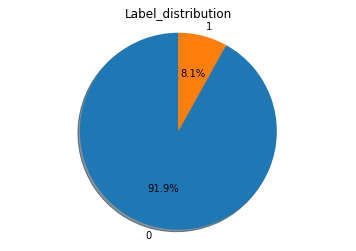

In [14]:
labels,counts = np.unique(application_train['TARGET'], return_counts = True)

fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
ax1.set_title('Label_distribution')

In [15]:
labels,counts = np.unique(installments_payments['SK_ID_CURR'], return_counts = True)
counts.sort()
counts

array([  1,   1,   1, ..., 347, 350, 372])

339587
[11440, 42217, 84156, 113590, 54466, 33718]


Text(0.5,1,'Installments_Payment_History')

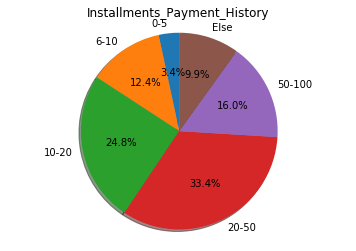

In [16]:
labels = ['0-5','6-10','10-20','20-50','50-100','Else']
mask = ((counts < 5))
c5 = len(counts[mask])
mask = ((counts >= 5) & (counts < 10))
c10 = len(counts[mask])
mask = ((counts >= 10) & (counts < 20))
c20 = len(counts[mask])
mask = ((counts >= 20) & (counts < 50))
c50 = len(counts[mask])
mask = ((counts >= 50) & (counts < 100))
c100 = len(counts[mask])
mask = ((counts >= 100))
cE = len(counts[mask])
sizes = [c5, c10, c20, c50, c100, cE]
print(len(counts))
print(sizes)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
ax1.set_title('Installments_Payment_History')

In [17]:
# unbalanced training set
# most people have number of installments payments between 10-50
# use variance length of RNN with maximum length of XX ...maybe

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  61.  68.  72.  73. 178.]


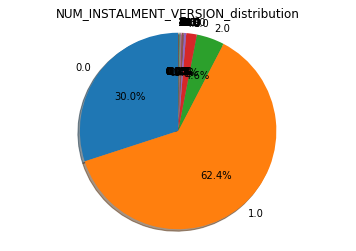

In [18]:
labels,counts = np.unique(installments_payments['NUM_INSTALMENT_VERSION'], return_counts = True)

fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
ax1.set_title('NUM_INSTALMENT_VERSION_distribution')
print(labels)